### Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
from numpy.random import random, seed, normal

from mpl_toolkits.mplot3d import axes3d

import tensorflow as tf

from mpl_toolkits.mplot3d import axes3d

SEED = 0

## Import from local directory
import sys
sys.path.insert(0, './fnn')

from chaos_models import *
from utils import *
from models import *

# %matplotlib inline
%matplotlib widget
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

# Geyser dataset

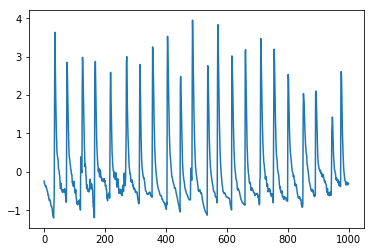

In [2]:
SAMPLE_WINDOW = 10000 # ~20 firings / 1000 timepoints
TRAIN_TIME = 200
LAMBDA_LATENT = 1e-1
LEARNING_RATE = 5e-4
BATCH_SIZE = 100
NUM_HIDDEN = 10
TIME_WINDOW = 10

geyser_data = np.load('datasets/geyser_train_test.pkl', allow_pickle=True)
# geyser_data = import_geyser()
data, data_test = (standardize_ts(geyser_data[SAMPLE_WINDOW:-SAMPLE_WINDOW][:(SAMPLE_WINDOW+NUM_HIDDEN)], 1), 
                   standardize_ts(geyser_data[SAMPLE_WINDOW:-SAMPLE_WINDOW][-(SAMPLE_WINDOW+NUM_HIDDEN):], 1))
data_mat, data_mat_test = [hankel_matrix(data, SAMPLE_WINDOW , q=TIME_WINDOW),
                           hankel_matrix(data_test, SAMPLE_WINDOW , q=TIME_WINDOW)]
X_train = data_mat[np.newaxis, :, :SAMPLE_WINDOW].T ## (samples, lookback, features)
X_test = data_mat_test[np.newaxis, :, :SAMPLE_WINDOW].T ## (samples, lookback, features)

plt.plot(data[:1000])

In [ ]:
try:
    del enc, dec
except:
    pass
enc, dec = train_autoencoder(X_train, network_type='lstm', lambda_latent=LAMBDA_LATENT, learning_rate=LEARNING_RATE)

<Figure size 432x288 with 0 Axes>

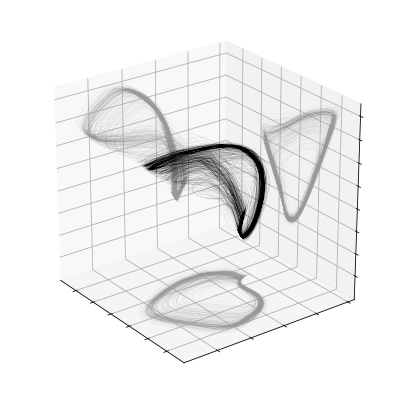

<Figure size 432x288 with 0 Axes>

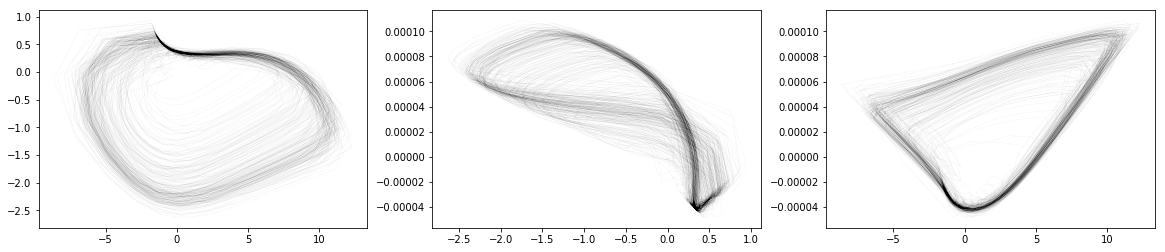

In [15]:
coords_geyser = enc.predict(X_test)[TIME_WINDOW:]

plt.figure()
plot3dproj(coords_geyser[:,0], coords_geyser[:,1], coords_geyser[:,2], shadow_dist=2, elev_azim=(25,-37))

plt.figure()
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20,4))
ax[0].plot(coords_geyser[:,0], coords_geyser[:,1], 'k', linewidth=.02)
ax[1].plot(coords_geyser[:,1], coords_geyser[:,2], 'k', linewidth=.02)
ax[2].plot(coords_geyser[:,0], coords_geyser[:,2], 'k', linewidth=.02)

# Electricity dataset

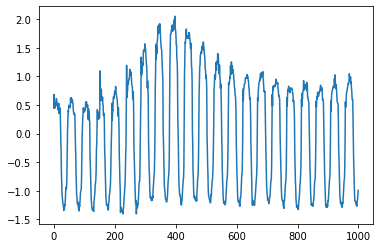

In [3]:
SAMPLE_WINDOW = 10000 # ~20 days / 1000 timepoints
TRAIN_TIME = 200
LAMBDA_LATENT = 5e-2
LEARNING_RATE = 1e-3
BATCH_SIZE = 100
NUM_HIDDEN = 10
TIME_WINDOW = 10


electricity_data = np.load('datasets/electricity_train_test.pkl', allow_pickle=True)
# electricity_data = np.load('resources/electricity/electricity_shortened.pkl', allow_pickle=True)
data, data_test = (standardize_ts(electricity_data[::2][-(SAMPLE_WINDOW+NUM_HIDDEN):], 1),
                   standardize_ts(electricity_data[::2][:(SAMPLE_WINDOW+NUM_HIDDEN)], 1))
data_mat, data_mat_test = [hankel_matrix(data, SAMPLE_WINDOW , q=TIME_WINDOW),
                           hankel_matrix(data_test, SAMPLE_WINDOW , q=TIME_WINDOW)]
X_train = data_mat[np.newaxis, :, :SAMPLE_WINDOW].T ## (samples, lookback, features)
X_test = data_mat_test[np.newaxis, :, :(SAMPLE_WINDOW)].T ## (samples, lookback, features)

plt.plot(data[:1000])

In [44]:
try:
    del enc, dec
except:
    pass
enc, dec = train_autoencoder(X_train, network_type='lstm', lambda_latent=LAMBDA_LATENT, learning_rate=LEARNING_RATE)

<Figure size 432x288 with 0 Axes>

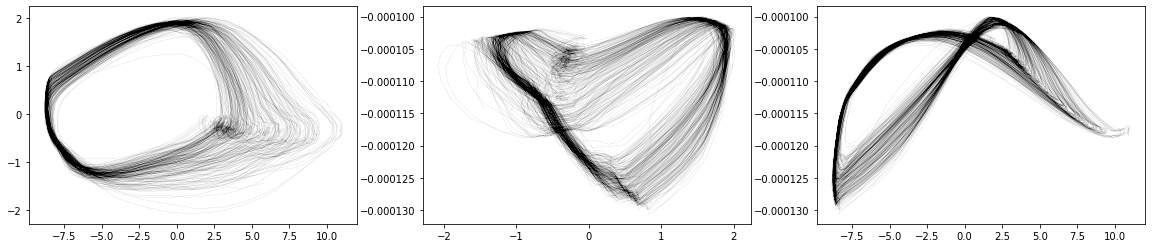

In [51]:
coords_electricity = enc.predict(X_test)[TIME_WINDOW:]

plt.figure()
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20,4))
ax[0].plot(coords_electricity[:,0], coords_electricity[:,1], 'k', linewidth=.05)
ax[1].plot(coords_electricity[:,1], coords_electricity[:,2], 'k', linewidth=.05)
ax[2].plot(coords_electricity[:,0], coords_electricity[:,2], 'k', linewidth=.05)

# ECG dataset

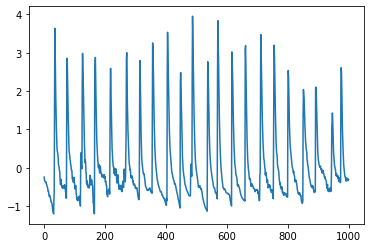

In [14]:
SAMPLE_WINDOW = 10000 # 16 heartbeats / 1000 timepoints
TRAIN_TIME = 200
LAMBDA_LATENT = 1e-2
LEARNING_RATE = 1e-4
LEARNING_RATE = 3e-4
BATCH_SIZE = 100
NUM_HIDDEN = 10
TIME_WINDOW = 10

data_train = standardize_ts(np.load('datasets/ecg_train.pkl', allow_pickle=True))
data_test = standardize_ts(np.load('datasets/ecg_test.pkl', allow_pickle=True))
# data, data_test = (standardize_ts(import_ecg(ind=2), 1), 
#                    standardize_ts(import_ecg(ind=3), 1))
data_mat, data_mat_test = [hankel_matrix(data, SAMPLE_WINDOW , q=TIME_WINDOW),
                           hankel_matrix(data_test, SAMPLE_WINDOW , q=TIME_WINDOW)]
X_train = data_mat[np.newaxis, :, :SAMPLE_WINDOW].T ## (samples, lookback, features)
X_test = data_mat_test[np.newaxis, :, :SAMPLE_WINDOW].T ## (samples, lookback, features)

%matplotlib inline
plt.plot(data[:1000])

In [ ]:
try:
    del enc, dec
except:
    pass
enc, dec = train_autoencoder(X_train, network_type='lstm', lambda_latent=LAMBDA_LATENT, learning_rate=LEARNING_RATE)

In [ ]:
coords_ecg = enc.predict(X_test)[TIME_WINDOW:]

# plt.figure()
# plot3dproj(coords_ecg[:,0], coords_ecg[:,1], coords_ecg[:,2], 
#            shadow_dist=[1.4,1.4,-4], elev_azim=(25,-37) )

plt.figure()
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20,4))
ax[0].plot(coords_ecg[:,0], coords_ecg[:,1], 'k', linewidth=.08)
ax[1].plot(coords_ecg[:,1], coords_ecg[:,2], 'k', linewidth=.08)
ax[2].plot(coords_ecg[:,0], coords_ecg[:,2], 'k', linewidth=.08)

<Figure size 432x288 with 0 Axes>

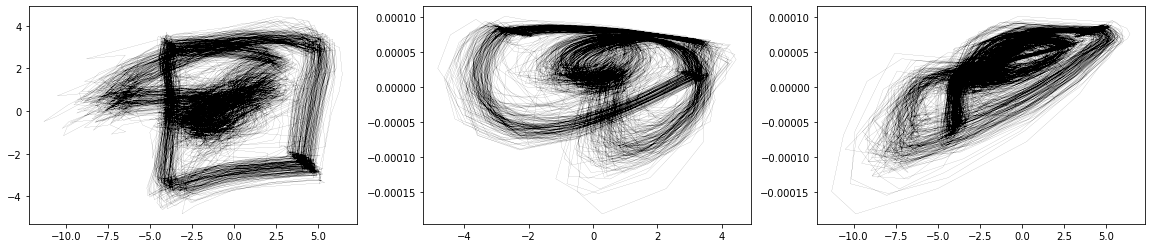

In [63]:
coords_ecg = enc.predict(X_test)[TIME_WINDOW:]

# plt.figure()
# plot3dproj(coords_ecg[:,0], coords_ecg[:,1], coords_ecg[:,2], 
#            shadow_dist=[1.4,1.4,-4], elev_azim=(25,-37) )

plt.figure()
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20,4))
ax[0].plot(coords_ecg[:,0], coords_ecg[:,1], 'k', linewidth=.08)
ax[1].plot(coords_ecg[:,1], coords_ecg[:,2], 'k', linewidth=.08)
ax[2].plot(coords_ecg[:,0], coords_ecg[:,2], 'k', linewidth=.08)

# Mouse dataset

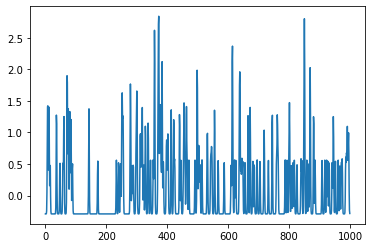

In [11]:
n_features = 1
NUM_HIDDEN = 10
TIME_WINDOW = 10
LAMBDA_LATENT = 1e-2
LEARNING_RATE = 5e-4
BATCH_SIZE = 100
SAMPLE_WINDOW = 5000
TRAIN_TIME = 200
NUM_HIDDEN = 10
TIME_WINDOW = 10

mouse_data = np.load('datasets/mouse.pkl', allow_pickle=True) # import_neural(neuron_index=3)
data, data_test = (standardize_ts(mouse_data[::2][:(SAMPLE_WINDOW+NUM_HIDDEN)], 2), 
                   standardize_ts(mouse_data[::2][-(2*SAMPLE_WINDOW+NUM_HIDDEN):], 2))
data_mat, data_mat_test = [hankel_matrix(data, SAMPLE_WINDOW , q=TIME_WINDOW),
                           hankel_matrix(data_test, SAMPLE_WINDOW , q=TIME_WINDOW)]
X_train = data_mat[np.newaxis, :, :SAMPLE_WINDOW].T ## (samples, lookback, features)
X_test = data_mat_test[np.newaxis, :, :SAMPLE_WINDOW].T ## (samples, lookback, features)


%matplotlib inline
plt.plot(data[:1000])

In [12]:
try:
    del enc, dec
except:
    pass
enc, dec = train_autoencoder(X_train, network_type='lstm', lambda_latent=LAMBDA_LATENT, learning_rate=LEARNING_RATE)

<Figure size 432x288 with 0 Axes>

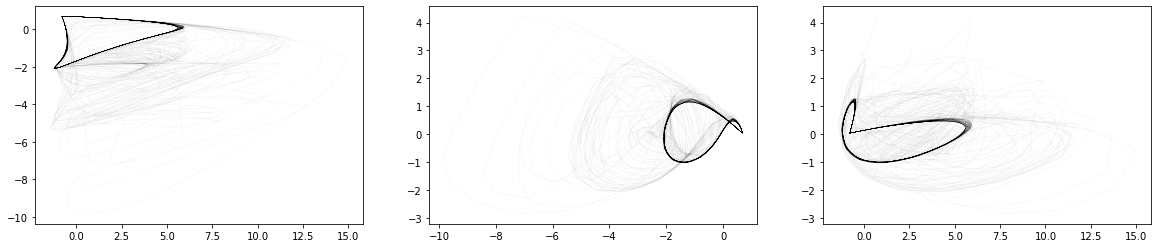

In [13]:
coords_mouse = enc.predict(X_test)[TIME_WINDOW:]

# plt.figure()
# plot3dproj(coords_ecg[:,0], coords_ecg[:,1], coords_ecg[:,2], 
#            shadow_dist=[1.4,1.4,-4], elev_azim=(25,-37) )

plt.figure()
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20,4))
ax[0].plot(coords_mouse[:,0], coords_mouse[:,1], 'k', linewidth=.02)
ax[1].plot(coords_mouse[:,1], coords_mouse[:,2], 'k', linewidth=.02)
ax[2].plot(coords_mouse[:,0], coords_mouse[:,2], 'k', linewidth=.02)